<a href="https://colab.research.google.com/github/shivani-mate-10/CODSOFT/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


#Loading Datset

In [3]:
Titanic_data=pd.read_csv('Titanic-Dataset.csv')
Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Dimension Of Dataset

In [4]:
print(Titanic_data.shape)

(891, 12)


#Checking if there is any null value in Dataset

In [5]:
Titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Cabin column contains many missing columns so we'll drop the Cabin column
Data1 = Titanic_data.drop(columns='Cabin')
Data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
# Replace the missing values in Age column with mean value
Data1['Age'].fillna(Data1['Age'].mean(), inplace=True)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
#Fill missing Embarked values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
Data1['Embarked'] = imputer.fit_transform(Data1[['Embarked']]).ravel()


In [9]:
Data1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
# Statistical measures about the data
Data1.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
# Printing the target column
Data1["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
# Finding the number of people survived and not survived
Data1['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Survived and Not Survived in Titanic Data')

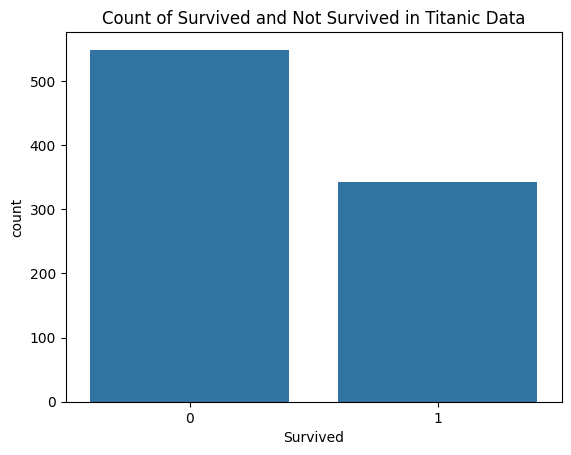

In [14]:
# Graphical representation of Survived Passenger column
sns.countplot(x='Survived', data=Data1)
plt.title('Count of Survived and Not Survived in Titanic Data')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
# Use OneHotEncoder to encode 'Sex' and 'Embarked'
categorical_features = ['Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess numeric features
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Define the preprocessing pipeline
X = Data1.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = Data1['Survived']



#Splitting data into train and test

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(     Pclass     Sex        Age  SibSp  Parch      Fare Embarked
 331       1    male  45.500000      0      0   28.5000        S
 733       2    male  23.000000      0      0   13.0000        S
 382       3    male  32.000000      0      0    7.9250        S
 704       3    male  26.000000      1      0    7.8542        S
 813       3  female   6.000000      4      2   31.2750        S
 ..      ...     ...        ...    ...    ...       ...      ...
 106       3  female  21.000000      0      0    7.6500        S
 270       1    male  29.699118      0      0   31.0000        S
 860       3    male  41.000000      2      0   14.1083        S
 435       1  female  14.000000      1      2  120.0000        S
 102       1    male  21.000000      0      1   77.2875        S
 
 [712 rows x 7 columns],
      Pclass     Sex        Age  SibSp  Parch     Fare Embarked
 709       3    male  29.699118      1      1  15.2458        C
 439       2    male  31.000000      0      0  10.5000        S
 

In [17]:
#Model evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, precision, recall, f1, conf_matrix, class_report


(0.8156424581005587,
 0.7971014492753623,
 0.7432432432432432,
 0.7692307692307693,
 array([[91, 14],
        [19, 55]]),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.87      0.85       105\n           1       0.80      0.74      0.77        74\n\n    accuracy                           0.82       179\n   macro avg       0.81      0.80      0.81       179\nweighted avg       0.81      0.82      0.81       179\n')

In [18]:
#Make prediction
# Example new data (assuming the same structure as the training data)
new_data = pd.DataFrame({
    'Pclass': [3, 1],
    'Sex': ['male', 'female'],
    'Age': [22, 38],
    'SibSp': [1, 1],
    'Parch': [0, 0],
    'Fare': [7.25, 71.2833],
    'Embarked': ['S', 'C']
})
print(new_data)

# Make predictions
new_predictions = model.predict(new_data)
new_predictions


   Pclass     Sex  Age  SibSp  Parch     Fare Embarked
0       3    male   22      1      0   7.2500        S
1       1  female   38      1      0  71.2833        C


array([0, 1])